In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
import textwrap as tr
import wikipedia
import matplotlib.patheffects as path_effects

In [2]:
from matplotlib import font_manager

font_dirs = ['/Users/nurek/jupyter/sf-distant-galaxy/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

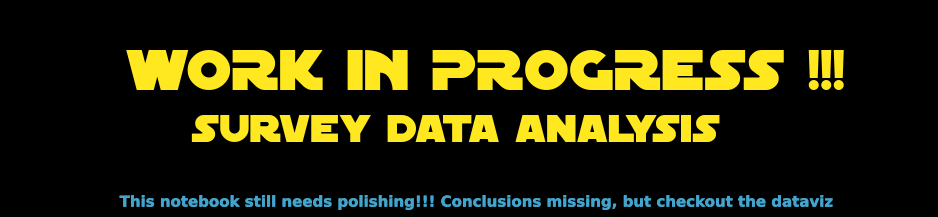

In [3]:
fig, ax = plt.subplots(figsize=(16, 3))
fig.patch.set_facecolor('black')
fig.suptitle('WORK IN PROGRESS !!!', family='SF Distant Galaxy', fontsize=60, color="#FFE81F", y =0.7, x=0.52)
plt.text(s='Survey Data analysis',  family='SF Distant Galaxy', fontsize=40, color="#FFE81F", y =0.2,x=0.18)

text0 = plt.text(s='This notebook still needs polishing!!! Conclusions missing, but checkout the dataviz', color='#43a5cf', weight='heavy', x=0.1, y=-0.2, size=15)

texts = [text0]
for text in texts:
    text.set_path_effects([path_effects.Stroke(offset=(0.3, 0.3),linewidth=0.2, foreground='#4BD5EE'),
                       path_effects.Normal()])
# #

ax.set_facecolor('black')

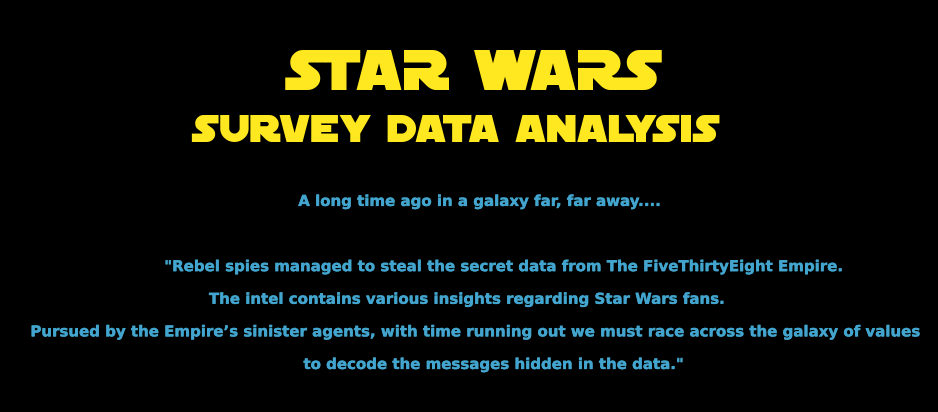

In [4]:
fig, ax = plt.subplots(figsize=(16, 3))
fig.patch.set_facecolor('black')
fig.suptitle('STAR WARS ', family='SF Distant Galaxy', fontsize=60, color="#FFE81F", y =0.7, x=0.52)
plt.text(s='Survey Data analysis',  family='SF Distant Galaxy', fontsize=40, color="#FFE81F", y =0.2,x=0.18)

text0 = plt.text(s='A long time ago in a galaxy far, far away....', color='#43a5cf', weight='heavy', x=0.3, y=-0.2, size=15)
text1 = plt.text(s='"Rebel spies managed to steal the secret data from The FiveThirtyEight Empire.', color='#43a5cf', weight='heavy', x=0.15, y=-0.6, size=15)
text2 = plt.text(s='The intel contains various insights regarding Star Wars fans. ', color='#43a5cf', weight='heavy', x=0.2, y=-0.8, size=15)
text3 = plt.text(s='Pursued by the Empire’s sinister agents, with time running out we must race across the galaxy of values', color='#43a5cf', weight='heavy', x=0, y=-1, size=15)
text4 = plt.text(s=' to decode the messages hidden in the data."  ', color='#43a5cf', weight='heavy', x=0.3, y=-1.2, size=15)
text5 = plt.text(s='   ', color='#43a5cf', weight='heavy', x=0.3, y=-1.4, size=15)

texts = [text0, text1, text2, text3, text4]
for text in texts:
    text.set_path_effects([path_effects.Stroke(offset=(0.3, 0.3),linewidth=0.2, foreground='#4BD5EE'),
                       path_effects.Normal()])
# #

ax.set_facecolor('black')

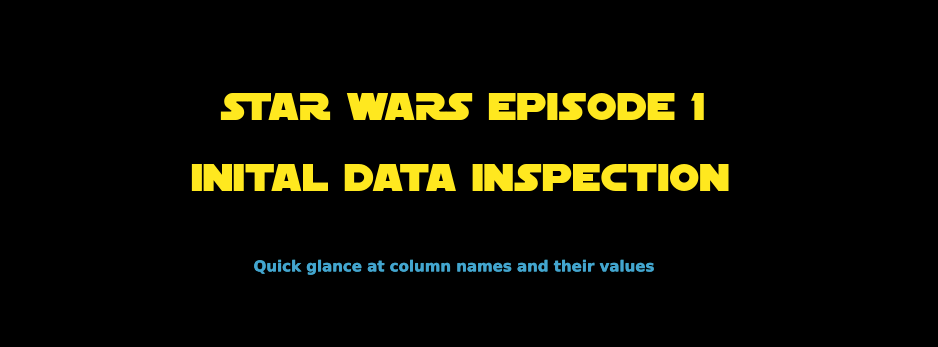

In [5]:
fig, ax = plt.subplots(figsize=(16, 3))
fig.patch.set_facecolor('black')
fig.suptitle('STAR WARS episode 1', family='SF Distant Galaxy', fontsize=40, color="#FFE81F", y =0.5)
plt.text(s='Inital data inspection',  family='SF Distant Galaxy', fontsize=40, color="#FFE81F", y =-0.1,x=0.18)

text0 = plt.text(s='Quick glance at column names and their values', color='#43a5cf', weight='heavy', x=0.25, y=-0.6, size=15)
text1 = plt.text(s='  ', color='#43a5cf', weight='heavy', x=0.1, y=-1, size=15)


texts = [text0]
for text in texts:
    text.set_path_effects([path_effects.Stroke(offset=(0.3, 0.3),linewidth=0.2, foreground='#4BD5EE'),
                       path_effects.Normal()])
# #

ax.set_facecolor('black')

In [6]:
star_wars = pd.read_csv("star_wars2.csv", encoding="ISO-8859-1")

In [7]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [8]:
star_wars_1row = star_wars.iloc[0]
star_wars = star_wars.iloc[1:]

In [9]:
star_wars.columns.tolist()

['RespondentID',
 'Have you seen any of the 6 films in the Star Wars franchise?',
 'Do you consider yourself to be a fan of the Star Wars film franchise?',
 'Which of the following Star Wars films have you seen? Please select all that apply.',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Which character shot first?',
 'Are you familiar with the Expanded Universe?',
 'Do you consider yourself to be a fan of the Expan

In [10]:
star_wars['Location (Census Region)'].value_counts()

East North Central    181
Pacific               175
South Atlantic        170
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: Location (Census Region), dtype: int64

In [11]:
star_wars.iloc[:,10:]

,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,4,6,3,2,1,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Very favorably,...,Very favorably,Han,No,NaN,Yes,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1183,5,6,2,3,1,Very favorably,Somewhat favorably,Very favorably,Somewhat unfavorably,Very favorably,...,Very favorably,I don't understand this question,No,NaN,Yes,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,Female,30-44,"$50,000 - $99,999",Bachelor degree,Middle Atlantic
1185,3,6,5,2,1,Very favorably,Neither favorably nor unfavorably (neutral),Very favorably,Very favorably,Very favorably,...,Very favorably,Han,No,NaN,Yes,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central


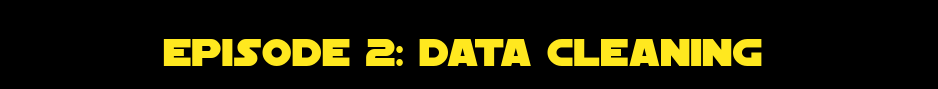

In [12]:
fig, ax = plt.subplots(figsize=(16, 1))
fig.patch.set_facecolor('black')
fig.suptitle('episode 2: Data cleaning', family='SF Distant Galaxy', fontsize=40, color="#FFE81F", y =0.5)

# text0 = plt.text(s='Quick glance at column names and their values', color='#43a5cf', weight='heavy', x=0.1, y=-0, size=15)
# text1 = plt.text(s='Forces of ', color='#43a5cf', weight='heavy', x=0.1, y=-0.2, size=15)
# text2 = plt.text(s='  ', color='#43a5cf', weight='heavy', x=0.1, y=-0.4, size=15)


# texts = [text0, text1]
# for text in texts:
#     text.set_path_effects([path_effects.Stroke(offset=(0.3, 0.3),linewidth=0.2, foreground='#4BD5EE'),
#                        path_effects.Normal()])
# # #

ax.set_facecolor('black')

In [13]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [14]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = np.where(star_wars['Have you seen any of the 6 films in the Star Wars franchise?']=='Yes',True,False)

In [15]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [16]:
star_wars.loc[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].notnull(),'Do you consider yourself to be a fan of the Star Wars film franchise?'] = np.where(star_wars.loc[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].notnull(),'Do you consider yourself to be a fan of the Star Wars film franchise?']=='Yes',True,False)

In [17]:
star_wars['Which character shot first?'].value_counts()

Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64

In [18]:
star_wars.loc[star_wars['Which character shot first?'] == 'I don\'t understand this question', 'Which character shot first?'] = 'I don\'t understand'

In [19]:
# col_names = star_wars.columns[3:9]
# pd.Series({c: star_wars[c].unique() for c in star_wars.columns[3:9]})

In [20]:
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [21]:
# renaming columns:
for n in range(3,9):
    c = n - 2
    star_wars = star_wars.rename(columns= {star_wars.columns[n]: 'seen_' + str(c)}) 

seen_not_seen = {np.NaN: False,
    "Star Wars: Episode I  The Phantom Menace": True,  
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True 
    
}
for c in star_wars.columns[3:9]:
    star_wars[c] = star_wars[c].map(seen_not_seen)

In [22]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
# renaming columns:
for n in range(9,15):
    c = n - 8
    star_wars = star_wars.rename(columns= {star_wars.columns[n]: 'ranking_' + str(c)}) 

In [23]:
# renaming character columns:
for n in range(15,29):
    star_wars = star_wars.rename(columns= {star_wars.columns[n]:star_wars_1row[n]})
    
# replacing string values with point values:
opinions = star_wars.iloc[:,15].value_counts().index.tolist()
opinions.pop(3)
n = 6
opinions_dictionary = {}
for op in opinions:
    n -= 1
    opinions_dictionary[op] = n

for c in star_wars.columns[15:29]:
    star_wars[c] = star_wars[c].map(opinions_dictionary)

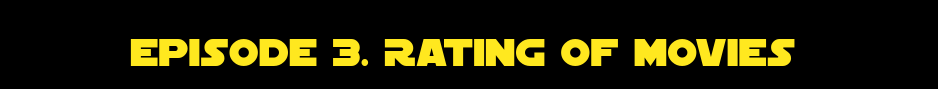

In [24]:
fig, ax = plt.subplots(figsize=(16, 1))
fig.patch.set_facecolor('black')
fig.suptitle('Episode 3. Rating of movies', family='SF Distant Galaxy', fontsize=40, color="#FFE81F", y =0.5)
ax.set_facecolor('black')

In [25]:
# atm the most favorite film is getting the lowest score, we want to reverse that:
star_wars.iloc[:,9:15] = 7 - star_wars.iloc[:,9:15]

In [26]:
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.267066
ranking_2    2.912679
ranking_3    2.658683
ranking_4    3.727273
ranking_5    4.486842
ranking_6    3.952153
dtype: float64

In [27]:
all_movies_mean = star_wars[star_wars.columns[9:15]].mean().mean()
new_movies_mean = star_wars[star_wars.columns[9:12]].mean().mean()
old_movies_mean = star_wars[star_wars.columns[12:15]].mean().mean()

In [28]:
star_wars['rate_new_trilogy'] = star_wars[star_wars.columns[9:12]].mean(axis=1)
star_wars['rate_old_trilogy'] = star_wars[star_wars.columns[12:15]].mean(axis=1)

In [29]:
all_movies_mean = star_wars[star_wars.columns[9:15]].mean().mean()
new_movies_mean = star_wars[star_wars.columns[9:12]].mean().mean()
old_movies_mean = star_wars[star_wars.columns[12:15]].mean().mean()

In [30]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
not_fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]
normal = star_wars[star_wars["Which character shot first?"] == "I don't understand"]
nerd = star_wars[star_wars["Which character shot first?"] == "Greedo"]
pro_nerd = star_wars[star_wars["Which character shot first?"] == "Han"]

In [87]:
# creating dataframe for all various fan groups:
df = pd.DataFrame({
    'Episode Rating': list(star_wars.columns[9:15]),
    'Overall': list(star_wars[star_wars.columns[9:15]].mean()),
    'Males': list(males[males.columns[9:15]].mean()),
    'Females': list(females[females.columns[9:15]].mean()),
    'Fans': list(fan[fan.columns[9:15]].mean()),
    'Not fans': list(not_fan[not_fan.columns[9:15]].mean()),
    'Don\'t understand': list(normal[normal.columns[9:15]].mean()),
    'Greedo shot 1': list(nerd[nerd.columns[9:15]].mean()),
    'Han shot 1': list(pro_nerd[pro_nerd.columns[9:15]].mean()),
    'Views': list(star_wars[star_wars.columns[3:9]].sum())
    
})
xlabels = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']

In [32]:
df

,Episode Rating,Overall,Males,Females,Fans,Not fans,Don't understand,Greedo shot 1,Han shot 1,viewership
0,ranking_1,3.267066,2.962175,3.570707,2.858696,4.063604,3.957377,3.142132,2.704615,673
1,ranking_2,2.912679,2.775414,3.045340,2.657609,3.408451,3.238562,2.761421,2.701538,571
2,ranking_3,2.658683,2.725118,2.581864,2.582577,2.806338,2.761438,2.573604,2.614198,550
3,ranking_4,3.727273,4.002364,3.455919,4.067029,3.066901,3.084967,3.898477,4.230769,607
4,ranking_5,4.486842,4.541371,4.430730,4.666667,4.137324,4.183007,4.629442,4.667692,758
5,ranking_6,3.952153,3.997636,3.921914,4.170290,3.528169,3.784314,3.994924,4.086154,738


In [33]:
star_wars.columns[-2:]

Index(['rate_new_trilogy', 'rate_old_trilogy'], dtype='object')

In [86]:
df_new_old = pd.DataFrame({
    'Trilogy': list(star_wars.columns[-2:]),
    'Overall': list(star_wars[star_wars.columns[-2:]].mean()),
    'Males': list(males[males.columns[-2:]].mean()),
    'Females': list(females[females.columns[-2:]].mean()),
    'Fans': list(fan[fan.columns[-2:]].mean()),
    'Not fans': list(not_fan[not_fan.columns[-2:]].mean()),
    'Don\'t understand': list(normal[normal.columns[-2:]].mean()),
    'Greedo shot 1': list(nerd[nerd.columns[-2:]].mean()),
    'Han shot 1': list(pro_nerd[pro_nerd.columns[-2:]].mean()),
    'Views': list(star_wars[star_wars.columns[-2:]].sum())
    
})
df_new_old
#  = star_wars[star_wars.columns[9:12]].mean(axis=1)
# star_wars['rate_old_trilogy']

,Trilogy,Overall,Males,Females,Fans,Not fans,Don't understand,Greedo shot 1,Han shot 1,Views
0,rate_new_trilogy,2.947767,2.823089,3.066751,2.701389,3.426643,3.319717,2.825719,2.676410,2464.333333
1,rate_old_trilogy,4.055423,4.180457,3.936188,4.301329,3.577465,3.684096,4.174281,4.328205,3390.333333


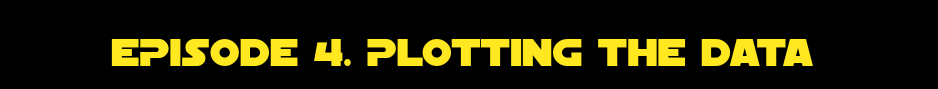

In [35]:
fig, ax = plt.subplots(figsize=(16, 1))
fig.patch.set_facecolor('black')
fig.suptitle('EPISODE 4. Plotting the data', family='SF Distant Galaxy', fontsize=40, color="#FFE81F", y =0.5)
ax.set_facecolor('black')

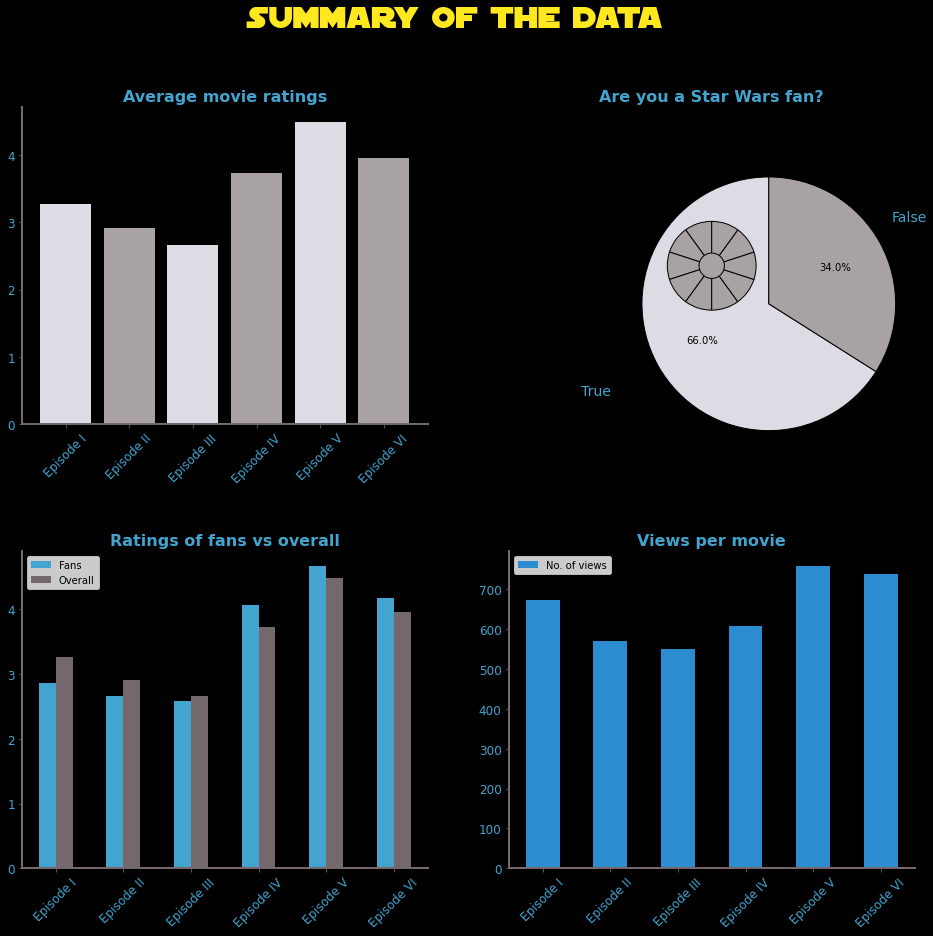

In [94]:
ticks = ['Episode I', 'Episode II', 'Episode III', 'Episode IV', 'Episode V', 'Episode VI']
colors = ['#dddce5','#a9a2a4','#2c8cd0','#74686c','#3f3639', '#130c0e']
for_empire = [1,1,1,1,1,1,1,1,1,1]
titles = ['Average movie ratings','Ratings of fans vs overall','Views per movie']
n=-1
fig, axes = plt.subplots(2,2,figsize=(16, 14))
fig.patch.set_facecolor('black')

labels = list(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].dropna().unique())
sizes = list(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts())
fig.suptitle('Summary of the data', family='SF Distant Galaxy', fontsize=32, color="#FFE81F")

ax1 = plt.subplot(221)
plt.bar(star_wars.columns[9:15], star_wars[star_wars.columns[9:15]].mean(), color=colors[:2])

ax2 = plt.subplot(222)
patches, texts, autotexts = ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors,
                                   labeldistance=1.42, center=(-1.25,0), wedgeprops={'edgecolor' :'black', })
ax2.set_title('Are you a Star Wars fan?', color='#43a5cf', weight='heavy', family='monospace', fontname='Sans', size=16)
for el in texts:
    el.set_fontsize(14)
    el.set_color('#43a5cf')
# DEATH STAR MOD:
plt.pie(for_empire,radius=0.35,startangle=90, wedgeprops={'edgecolor' :'black', 'fc':'#a9a2a4'},center=(-1.7,0.3) )
death_star2 = plt.Circle((-1.7,0.3),0.1,ec='black', fc='#a9a2a4')
fig = plt.gcf()
fig.gca().add_artist(death_star2)
    
ax3 = plt.subplot(223)
df.plot(x="Episode Rating", y=["Fans", "Overall"], kind="bar",ax=axes[1][0],color=['#43a5cf', '#74686c'])
plt.legend(loc=2)
ax4 = plt.subplot(224)
df.plot(x="Episode Rating", y="Views", kind="bar",ax=axes[1][1], color=colors[2], label='No. of views')
plt.legend(loc=2)
fig.subplots_adjust(hspace=0.4, wspace=0.2)
axes = [ax1, ax3, ax4]
for ax in axes:
    for location in [ 'right', 'top']:
            ax.spines[location].set_visible(False)
    for location in [ 'left', 'bottom']:
            ax.spines[location].set_linewidth(2)
            ax.spines[location].set_color('#74686c')
    n+=1
    ax.set_xticks([0,1,2,3,4,5])
    ax.set_xticklabels(ticks, rotation=45, color='#43a5cf')
    ax.tick_params(labelsize=12, color='#74686c')
    ax.set_facecolor('black')
    plt.setp(ax.get_yticklabels(), color='#43a5cf')
    ax.set_xlabel(None)
    ax.set_title(titles[n], color='#43a5cf', weight='heavy',  size=16)

plt.show()

In [37]:
star_wars['Education'].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

In [38]:
all_movies_mean = star_wars[star_wars.columns[9:15]].mean().mean()
new_movies_mean = star_wars[star_wars.columns[9:12]].mean().mean()
old_movies_mean = star_wars[star_wars.columns[12:15]].mean().mean()

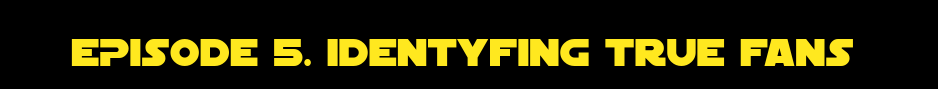

In [39]:
fig, ax = plt.subplots(figsize=(16, 1))
fig.patch.set_facecolor('black')
fig.suptitle('EPISODE 5. Identyfing true fans', family='SF Distant Galaxy', fontsize=40, color="#FFE81F", y =0.5)
ax.set_facecolor('black')

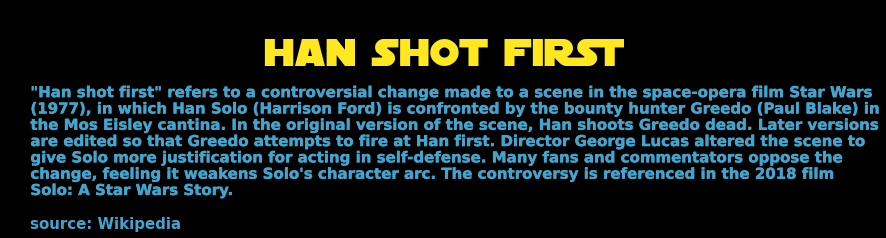

In [40]:
fig, ax = plt.subplots(figsize=(10, 1))
my_str = wikipedia.summary("Han shot first")
lines = tr.wrap(my_str, width=100)
fig.patch.set_facecolor('black')
fig.suptitle("Han shot first", family='SF Distant Galaxy', fontsize=40, color="#FFE81F", x=0.7,y =0.5)
z = 0.3
for line in lines:
    z -= 0.3
    text = plt.text(s=line, color='#43a5cf', weight='heavy', x=0.0, y=-0.6+z, size=15)
    text.set_path_effects([path_effects.Stroke(offset=(0.3, 0.3),linewidth=0.2, foreground='#4BD5EE'),
                       path_effects.Normal()])
ax.set_facecolor('black')
plt.text(s='source: Wikipedia', color='#43a5cf', weight='heavy', size=15, x = 0, y=-3)
plt.show()

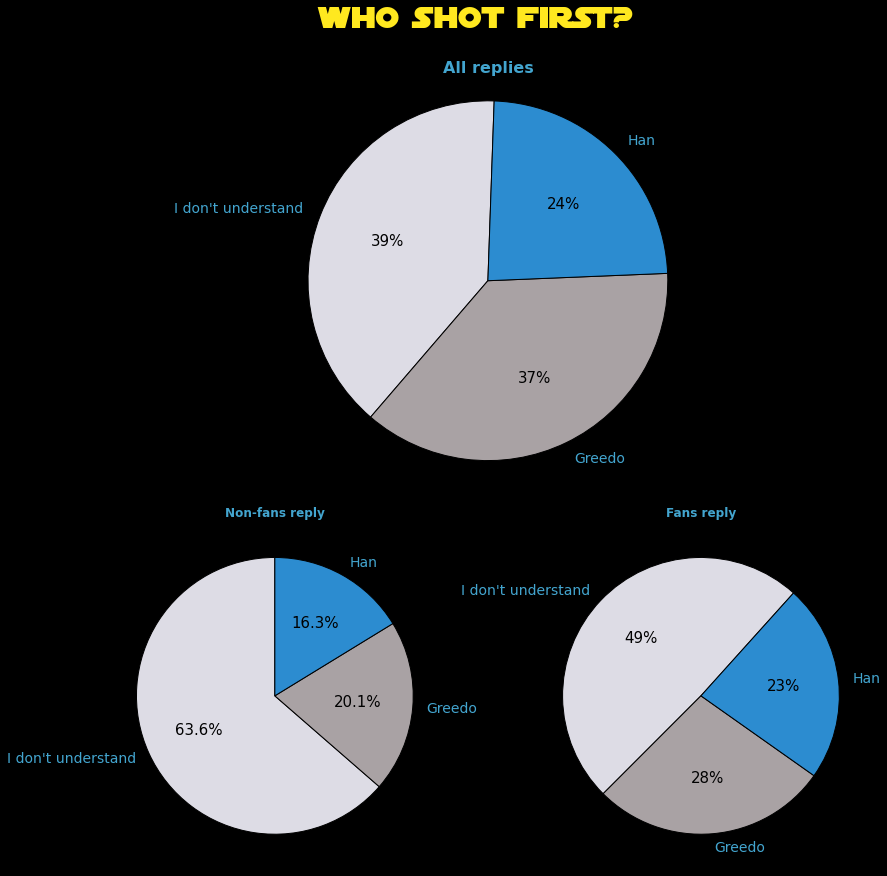

In [70]:
labels_han = list(star_wars['Which character shot first?'].dropna().unique())
sizes_han = list(star_wars['Which character shot first?'].value_counts())


labels_han_fan = list(fan['Which character shot first?'].dropna().unique())
sizes_han_fan = list(fan['Which character shot first?'].value_counts())
labels_not_fan = list(not_fan['Which character shot first?'].dropna().unique())
sizes_not_fan = list(not_fan['Which character shot first?'].value_counts())
labels = list(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].dropna().unique())
sizes = list(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts())
textprops = {"fontsize":15, "color":'black'} # Font size of text in pie chart

fig, axes = plt.subplots(figsize=(14, 14))
fig.patch.set_facecolor('black')
fig.suptitle('Who shot first?', family='SF Distant Galaxy', fontsize=32, color="#FFE81F")


ax0 = plt.subplot(211)
patches, texts, autotexts = ax0.pie(sizes_han, labels=labels_han, autopct='%1.0f%%', radius=1.3,
                            colors=colors, textprops=textprops, wedgeprops={'edgecolor' :'black' },startangle=88)
ax0.set_title('All replies', color='#43a5cf', weight='heavy', family='monospace', fontname='Sans', pad=35, size=16)
for el in texts:
    el.set_fontsize(14)
    el.set_color('#43a5cf')



ax2 = plt.subplot(223)
patches, texts, autotexts = ax2.pie(sizes_not_fan, labels=labels_not_fan, autopct='%1.1f%%', colors=colors, textprops=textprops, wedgeprops={'edgecolor' :'black' },
 startangle=90)
ax2.set_title('Non-fans reply', color='#43a5cf', weight='heavy', family='monospace', fontname='Sans')
for el in texts:
    el.set_fontsize(14)
    el.set_color('#43a5cf')


ax3 = plt.subplot(224)
patches, texts, autotexts = ax3.pie(sizes_han_fan, labels=labels_han_fan, autopct='%1.0f%%', 
                            colors=colors, textprops=textprops, wedgeprops={'edgecolor' :'black' },startangle=48)
ax3.set_title('Fans reply', color='#43a5cf', weight='heavy', family='monospace', fontname='Sans')

for el in texts:
    el.set_fontsize(14)
    el.set_color('#43a5cf')
plt.show()

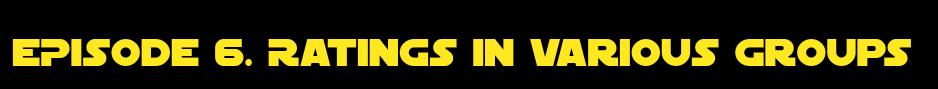

In [42]:
fig, ax = plt.subplots(figsize=(16, 1))
fig.patch.set_facecolor('black')
fig.suptitle('EPISODE 6. Ratings in various groups', family='SF Distant Galaxy', fontsize=40, color="#FFE81F", y =0.5)
ax.set_facecolor('black')

In [43]:
star_wars['Education'].value_counts()

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64

In [44]:
# creating a sorted list of education levels - we'll skip  'Less than high school degree' (only 7 respondents)
edu_list = star_wars['Education'].value_counts().index[:4].to_list()
edu_list.insert(0, edu_list.pop())
edu_list

['High school degree',
 'Some college or Associate degree',
 'Bachelor degree',
 'Graduate degree']

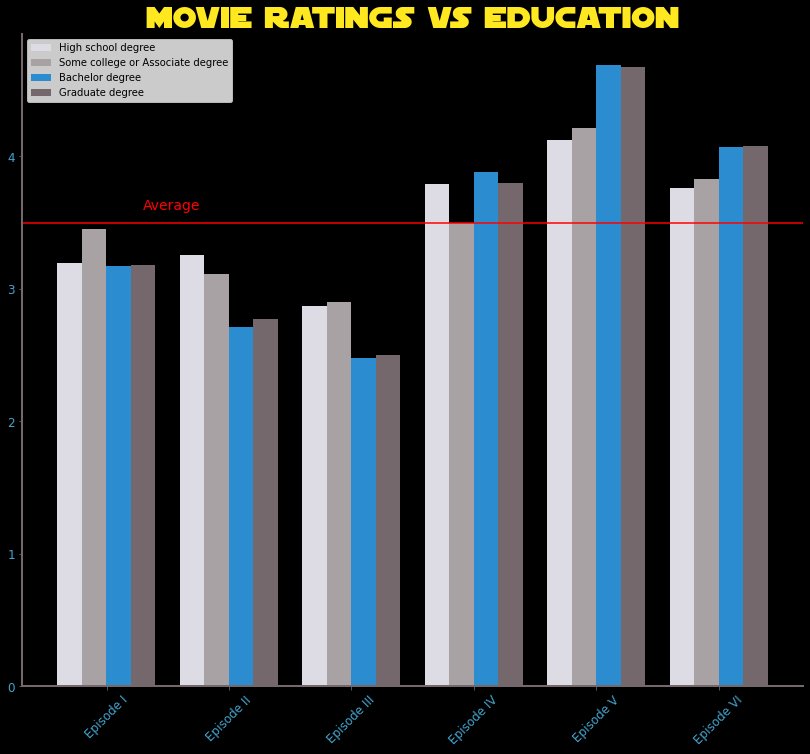

In [81]:
edu_list = star_wars['Education'].value_counts().index[:4].to_list()
edu_list.insert(0, edu_list.pop())
n=-1
x = np.arange(6)
width = 0.20
fig, ax = plt.subplots(figsize=(14, 12))
fig.patch.set_facecolor('black')
# plot a bar for every educational group:
for els in edu_list:
    n+=1
    width += 0.20
    plt.bar(x + width, 
            star_wars[star_wars['Education']==els][star_wars[star_wars['Education']==els].columns[9:15]].mean(), 
          width = 0.2, label=els, color=colors[n])
plt.axhline(3.5, color='r')
plt.text(x = 1, y = 3.6, s = 'Average', color ='r', rotation = 0, fontsize=14)
plt.legend()
# Style:
plt.title('Movie ratings vs education', family='SF Distant Galaxy', fontsize=32, color="#FFE81F")
for location in [ 'right', 'top']:
            ax.spines[location].set_visible(False)
for location in [ 'left', 'bottom']:
        ax.spines[location].set_linewidth(2)
        ax.spines[location].set_color('#74686c')
ax.set_xticks(x + width/1.425)
ax.set_xticklabels(ticks, rotation=45, color='#43a5cf')
ax.tick_params(labelsize=12, color='#74686c')
plt.setp(ax.get_yticklabels(), color='#43a5cf')
ax.set_facecolor('black')
plt.show()

In [46]:
star_wars['Age'].value_counts().index.tolist()

['45-60', '> 60', '30-44', '18-29']

In [47]:
age_list = star_wars['Age'].value_counts().index.tolist()
age_list.insert(0, age_list.pop())
age_list.insert(1, age_list.pop())
age_list

['18-29', '30-44', '45-60', '> 60']

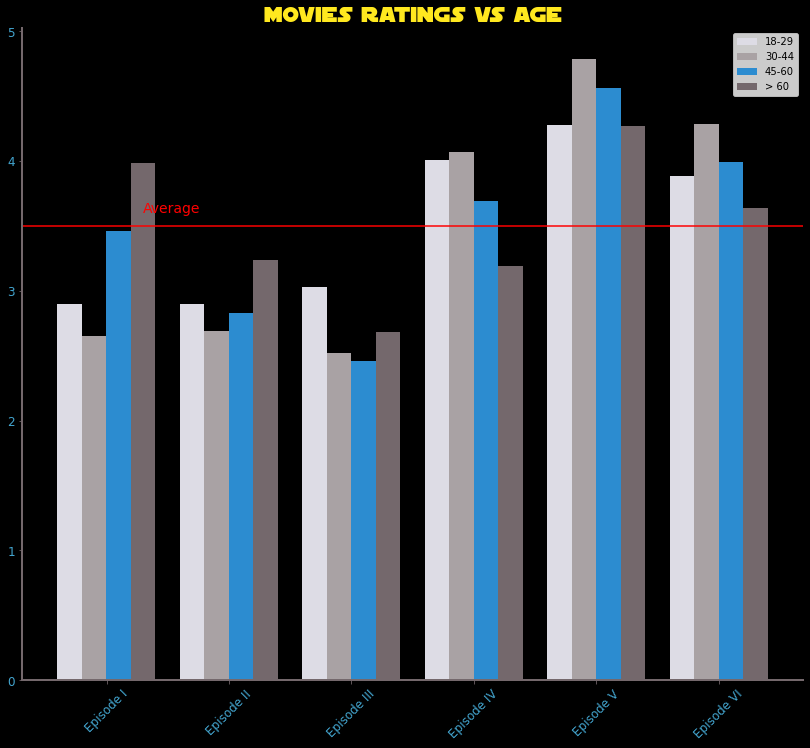

In [69]:
age_list = star_wars['Age'].value_counts().index.tolist()
age_list.insert(0, age_list.pop())
age_list.insert(1, age_list.pop())
n=-1
x = np.arange(6)
width = 0.20
fig, ax = plt.subplots(figsize=(14, 12))
fig.patch.set_facecolor('black')
# plot a bar for every educational group:
for els in age_list:
    n+=1
    width += 0.20
    plt.bar(x + width, 
            star_wars[star_wars['Age']==els][star_wars[star_wars['Age']==els].columns[9:15]].mean(), 
          width = 0.2, label=els, color=colors[n])
plt.axhline(3.5, color='r')
plt.text(x = 1, y = 3.6, s = 'Average', color ='r', rotation = 0, fontsize=14)
plt.legend()
# Style:
plt.title('Movies ratings vs age', family='SF Distant Galaxy', fontsize=32, color="#FFE81F")
for location in [ 'right', 'top']:
            ax.spines[location].set_visible(False)
for location in [ 'left', 'bottom']:
        ax.spines[location].set_linewidth(2)
        ax.spines[location].set_color('#74686c')
ax.set_xticks(x + width/1.425)
ax.set_xticklabels(ticks, rotation=45, color='#43a5cf')
ax.tick_params(labelsize=12, color='#74686c')
plt.setp(ax.get_yticklabels(), color='#43a5cf')
ax.set_facecolor('black')
plt.show()

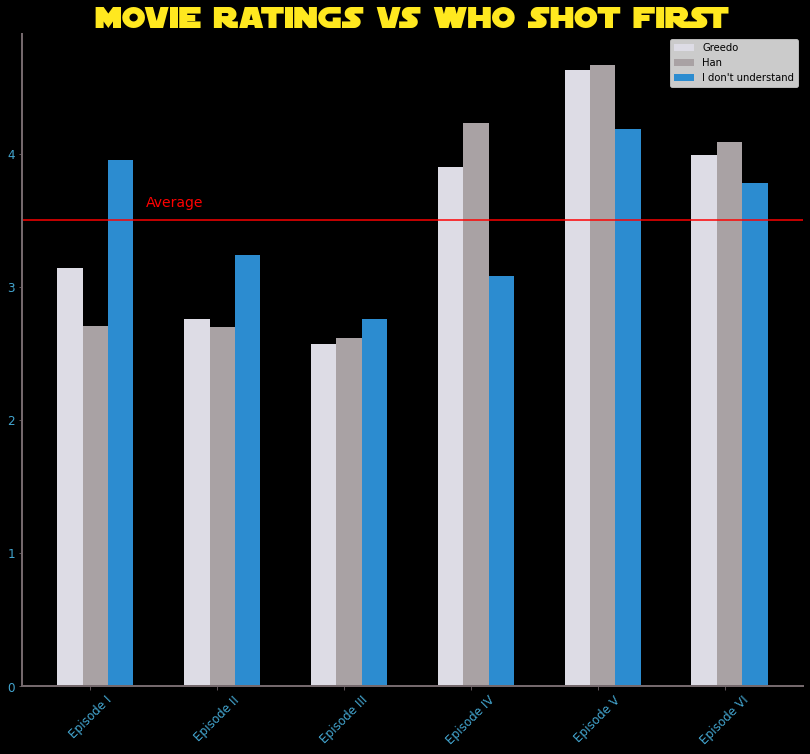

In [73]:
han_list = star_wars['Which character shot first?'].value_counts().index.tolist()
han_list.insert(0, han_list.pop())
n=-1
x = np.arange(6)
width = 0.20
fig, ax = plt.subplots(figsize=(14, 12))
fig.patch.set_facecolor('black')
# plot a bar for every educational group:
for els in han_list:
    n+=1
    width += 0.20
    plt.bar(x + width, 
            star_wars[star_wars['Which character shot first?']==els][star_wars[star_wars['Which character shot first?']==els].columns[9:15]].mean(), 
          width = 0.2, label=els, color=colors[n])
plt.axhline(3.5, color='r')
plt.text(x = 1, y = 3.6, s = 'Average', color ='r', rotation = 0, fontsize=14)
plt.legend()
# Style:
plt.title('Movie ratings vs who shot first', family='SF Distant Galaxy', fontsize=32, color="#FFE81F")
for location in [ 'right', 'top']:
            ax.spines[location].set_visible(False)
for location in [ 'left', 'bottom']:
        ax.spines[location].set_linewidth(2)
        ax.spines[location].set_color('#74686c')
ax.set_xticks(x + width/1.425)
ax.set_xticklabels(ticks, rotation=45, color='#43a5cf')
ax.tick_params(labelsize=12, color='#74686c')
plt.setp(ax.get_yticklabels(), color='#43a5cf')
ax.set_facecolor('black')
plt.show()

In [50]:
df_new_old.columns[1:-1]

Index(['Overall', 'Males', 'Females', 'Fans', 'Not fans', 'Don't understand',
       'Greedo shot 1', 'Han shot 1'],
      dtype='object')

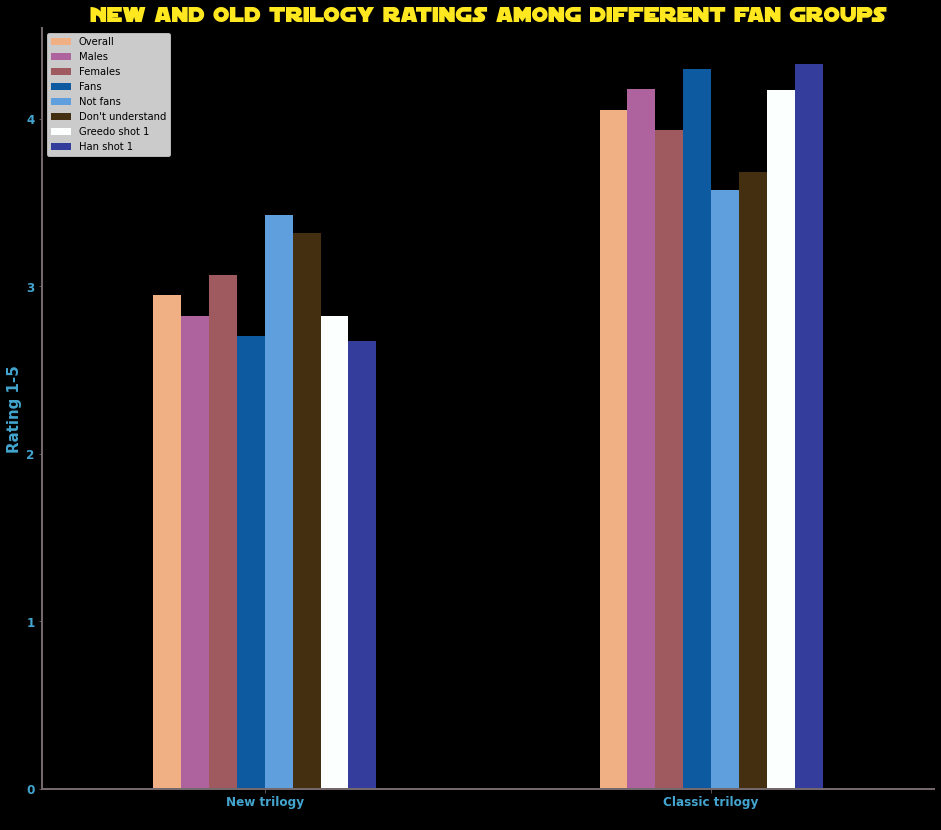

In [80]:
colors2 = [ '#f1b084', '#af639e', '#9f5a60', '#0d5aa0','#5f9fdd','#452f11','#fbfffe','#343d9b','#c48447']

labels = ['New trilogy', 'Classic trilogy']

fig, axes = plt.subplots(figsize=(16, 14))

# figure, axes = plt.subplots(1, 2)
# df1.plot()


fig.patch.set_facecolor('black')
# fig.suptitle('Summary of the data', family='SF Distant Galaxy', fontsize=22, color="#FFE81F")

ax3 = plt.subplot()
df_new_old.plot(x="Trilogy", y=df_new_old.columns[1:-1], kind="bar",color=colors2, ax=ax3)

fig.subplots_adjust(hspace=0.4, wspace=0.2)
axes = [ax3]
for ax in axes:
    for location in [ 'right', 'top']:
            ax.spines[location].set_visible(False)
    for location in [ 'left', 'bottom']:
            ax.spines[location].set_linewidth(2)
            ax.spines[location].set_color('#74686c')
    n+=1
#     ax.set_xticks([0,1,2,3,4,5])
    ax.set_xticklabels(labels, rotation=0, color='#43a5cf', size=15, weight='heavy')
    ax.tick_params(labelsize=12, color='#74686c')
    ax.set_facecolor('black')
    plt.setp(ax.get_yticklabels(), color='#43a5cf', weight='heavy')
    ax.set_ylabel('Rating 1-5', color='#43a5cf', size=15, weight='heavy')
    ax.set_title('New and Old Trilogy ratings among different fan groups', family='SF Distant Galaxy', fontsize=22, color="#FFE81F")
     
plt.show()




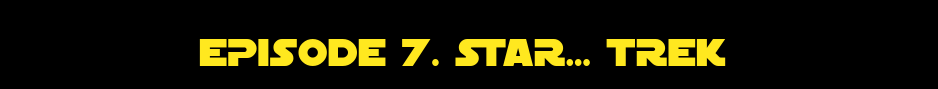

In [52]:
fig, ax = plt.subplots(figsize=(16, 1))
fig.patch.set_facecolor('black')
fig.suptitle('EPISODE 7. STAR... TREK', family='SF Distant Galaxy', fontsize=40, color="#FFE81F", y =0.5)
ax.set_facecolor('black')

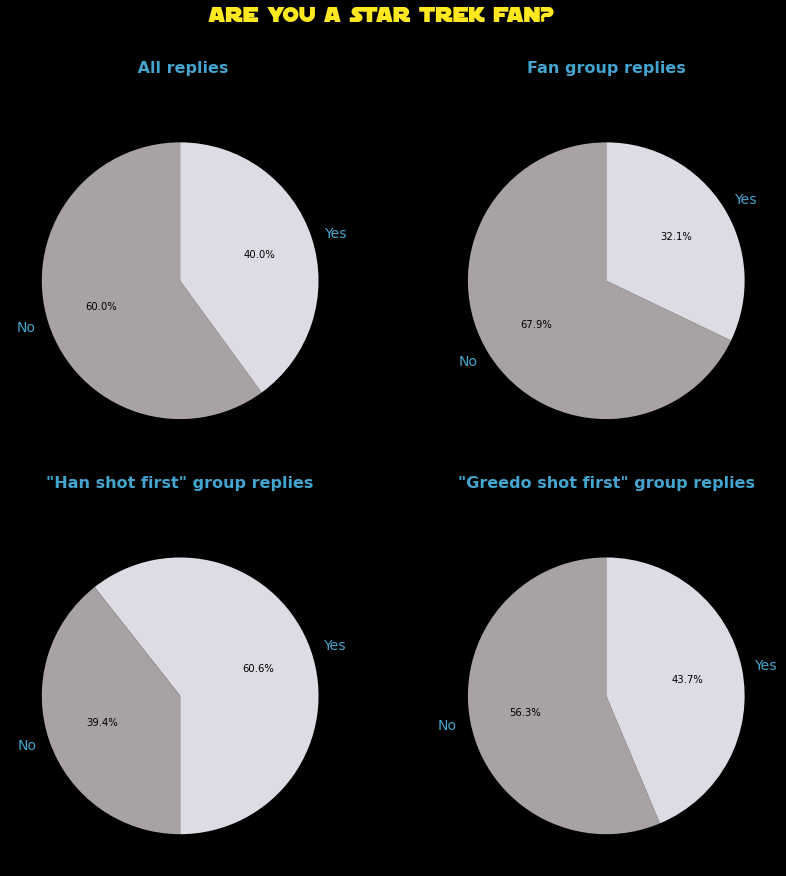

In [68]:
startrekf = list(fan['Do you consider yourself to be a fan of the Star Trek franchise?'].dropna().unique())
startrek_sizesf = list(fan['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts())
startrekpnerd = list(pro_nerd['Do you consider yourself to be a fan of the Star Trek franchise?'].dropna().unique())
startrek_sizespnerd = list(pro_nerd['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts())
startrek = list(star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].dropna().unique())
startrek_sizes = list(star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts())
greedo = list(nerd['Do you consider yourself to be a fan of the Star Trek franchise?'].dropna().unique())
greedo_sizes = list(nerd['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts())
colours = {'No': '#dddce5',
           'Yes': '#a9a2a4'}
labels = ['Yes','No']

fig, axes = plt.subplots(figsize=(14, 14))
fig.patch.set_facecolor('black')
fig.suptitle('Are you a Star Trek fan?', family='SF Distant Galaxy', fontsize=22, color="#FFE81F")


ax1 = plt.subplot(221)

patches, texts, autotexts = ax1.pie(startrek_sizes, labels=startrek, autopct='%1.1f%%',  colors=[colours[key] for key in labels[0:]],
         startangle=90)
ax1.set_title(' All replies', color='#43a5cf', weight='heavy', family='monospace', fontname='Sans', pad=35, size=16)

for el in texts:
    el.set_fontsize(14)
    el.set_color('#43a5cf')

ax2 = plt.subplot(222)

patches, texts, autotexts = ax2.pie(startrek_sizesf, labels=startrekf, autopct='%1.1f%%', colors=[colours[key] for key in labels[0:]],
         startangle=90)
ax2.set_title('Fan group replies', color='#43a5cf', weight='heavy', family='monospace', fontname='Sans', pad=35, size=16)

for el in texts:
    el.set_fontsize(14)
    el.set_color('#43a5cf')
    
    
ax3 = plt.subplot(223)
patches, texts, autotexts = ax3.pie(startrek_sizespnerd, labels=startrekpnerd, autopct='%1.1f%%',  
                                    colors=colors, startangle=270)
ax3.set_title('"Han shot first" group replies', color='#43a5cf', weight='heavy', family='monospace', fontname='Sans', pad=35, size=16)


for el in texts:
    el.set_fontsize(14)
    el.set_color('#43a5cf')


ax4 = plt.subplot(224)

patches, texts, autotexts = ax4.pie(greedo_sizes, labels=greedo, autopct='%1.1f%%',  
                                  colors=[colours[key] for key in labels[0:]], startangle=90)
ax4.set_title('"Greedo shot first" group replies', color='#43a5cf', weight='heavy', family='monospace', fontname='Sans', pad=35, size=16)



for el in texts:
    el.set_fontsize(14)
    el.set_color('#43a5cf')
    
    
    
    
plt.show()

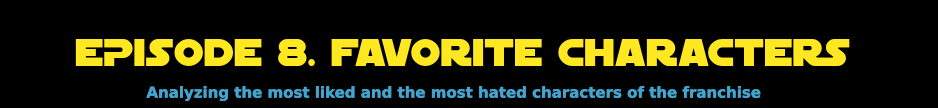

In [54]:
fig, ax = plt.subplots(figsize=(16, 1))
fig.patch.set_facecolor('black')
fig.suptitle('EPISODE 8. Favorite characters', family='SF Distant Galaxy', fontsize=40, color="#FFE81F", y =0.5)
text = plt.text(s='Analyzing the most liked and the most hated characters of the franchise', color='#43a5cf', weight='heavy', x=0.13, y=-0.6, size=15)
text.set_path_effects([path_effects.Stroke(offset=(0.3, 0.3),linewidth=0.2, foreground='#4BD5EE'),
                       path_effects.Normal()])
# ax.set_facecolor('black')
# plt.text(s='source: Wikipedia', color='#43a5cf', weight='heavy', size=15, x = 0, y=-3)
ax.set_facecolor('black')

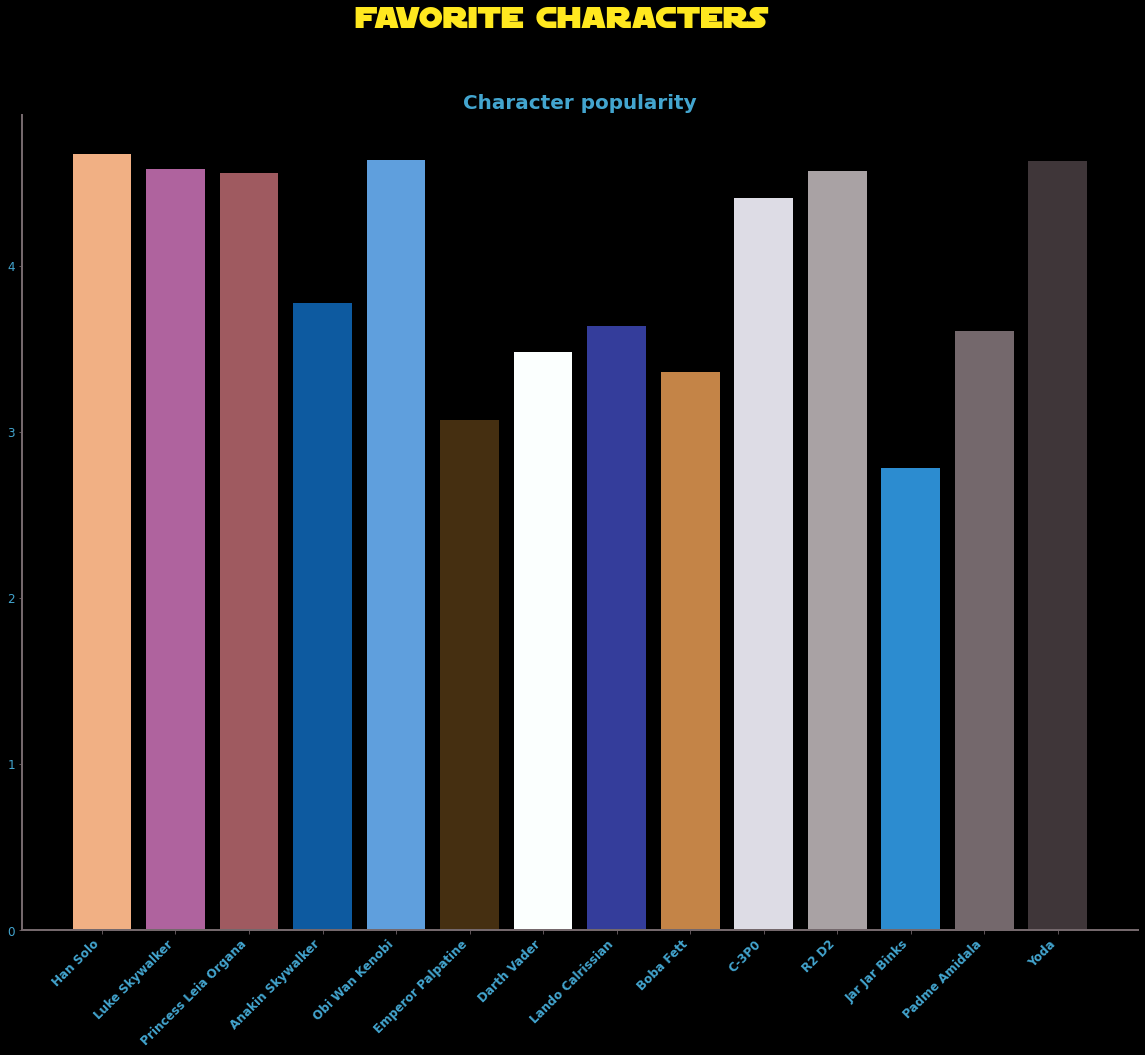

In [67]:
titles = ['Average movie ratings','Ratings of fans vs overall','Views per movie']
fig, axes = plt.subplots(figsize=(20, 15))
fig.patch.set_facecolor('black')
fig.suptitle('Favorite characters', family='SF Distant Galaxy', fontsize=32, color="#FFE81F")
ax = plt.subplot(111)
plt.bar(star_wars.columns[15:29], star_wars[star_wars.columns[15:29]].mean(), color=colors2+colors)



for location in [ 'right', 'top']:
        ax.spines[location].set_visible(False)
for location in [ 'left', 'bottom']:
        ax.spines[location].set_linewidth(2)
        ax.spines[location].set_color('#74686c')

ax.set_xticks(range(0,len(range(15,29))))
ax.set_xticklabels(star_wars.columns[15:29], rotation=45, color='#43a5cf', ha='right',  weight='heavy',  size=14)
ax.tick_params(labelsize=12, color='#74686c')
ax.set_facecolor('black')
plt.setp(ax.get_yticklabels(), color='#43a5cf')
ax.set_xlabel(None)
ax.set_title('Character popularity', color='#43a5cf', weight='heavy',  size=20)

plt.show()

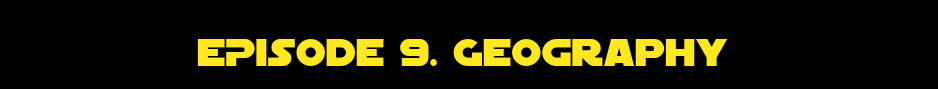

In [56]:
fig, ax = plt.subplots(figsize=(16, 1))
fig.patch.set_facecolor('black')
fig.suptitle('EPISODE 9. Geography', family='SF Distant Galaxy', fontsize=40, color="#FFE81F", y =0.5)
ax.set_facecolor('black')

In [57]:
data = gpd.read_file('usc/cb_2018_us_division_500k.shp') 
data

,DIVISIONCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,1,0300000US1,1,New England,69,162376417481,24072855206,"MULTIPOLYGON (((-67.32259 44.61160, -67.32174 ..."
1,2,0300000US2,2,Middle Atlantic,69,256981418064,26186444931,"MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ..."
2,3,0300000US3,3,East North Central,69,629289745590,151252485939,"MULTIPOLYGON (((-82.73571 41.60336, -82.73392 ..."
3,4,0300000US4,4,West North Central,69,1314707528663,33020781573,"MULTIPOLYGON (((-89.59206 47.96668, -89.59147 ..."
4,5,0300000US5,5,South Atlantic,69,687099317084,71741527671,"MULTIPOLYGON (((-75.56555 39.51485, -75.56174 ..."
5,8,0300000US8,8,Mountain,69,2216504548727,20112368319,"POLYGON ((-120.00574 39.22866, -120.00559 39.2..."
6,9,0300000US9,9,Pacific,69,2319697198955,296474924140,"MULTIPOLYGON (((-147.17351 60.91154, -147.1700..."
7,6,0300000US6,6,East South Central,69,461789786924,13245708132,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
8,7,0300000US7,7,West South Central,69,1100982564361,49097374744,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."


In [58]:
dfv = star_wars['Location (Census Region)'].value_counts().to_frame()

In [59]:
dfv['region'] = dfv.index
dfv = dfv.rename(columns={'Location (Census Region)':'count'})
dfv = dfv.reset_index()

In [60]:
data = data.rename(columns={'NAME':'region'})
inner_join = pd.merge(data, dfv, on ='region', how ='inner')

In [61]:
inner_join

,DIVISIONCE,AFFGEOID,GEOID,region,LSAD,ALAND,AWATER,geometry,index,count
0,1,0300000US1,1,New England,69,162376417481,24072855206,"MULTIPOLYGON (((-67.32259 44.61160, -67.32174 ...",New England,75
1,2,0300000US2,2,Middle Atlantic,69,256981418064,26186444931,"MULTIPOLYGON (((-72.03683 41.24984, -72.03496 ...",Middle Atlantic,122
2,3,0300000US3,3,East North Central,69,629289745590,151252485939,"MULTIPOLYGON (((-82.73571 41.60336, -82.73392 ...",East North Central,181
3,4,0300000US4,4,West North Central,69,1314707528663,33020781573,"MULTIPOLYGON (((-89.59206 47.96668, -89.59147 ...",West North Central,93
4,5,0300000US5,5,South Atlantic,69,687099317084,71741527671,"MULTIPOLYGON (((-75.56555 39.51485, -75.56174 ...",South Atlantic,170
5,8,0300000US8,8,Mountain,69,2216504548727,20112368319,"POLYGON ((-120.00574 39.22866, -120.00559 39.2...",Mountain,79
6,9,0300000US9,9,Pacific,69,2319697198955,296474924140,"MULTIPOLYGON (((-147.17351 60.91154, -147.1700...",Pacific,175
7,6,0300000US6,6,East South Central,69,461789786924,13245708132,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ...",East South Central,38
8,7,0300000US7,7,West South Central,69,1100982564361,49097374744,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ...",West South Central,110


In [62]:
# inner_join2 = inner_join
inner_join['geometry'] = inner_join.rotate(0, origin=inner_join.unary_union.centroid)

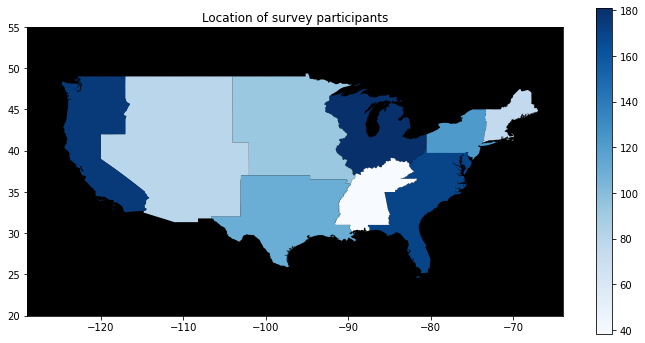

In [72]:
# fig, ax = plt.subplots(figsize=(20, 15))
# fig.patch.set_facecolor('black')
# ax = plt.subplot(111)

ax.set_facecolor('black')
ax = inner_join.plot(column="count", figsize=(12,12) ,cmap='Blues' ,legend=True,legend_kwds={'shrink': 0.5})
ax.set_xlim(-128.95, -64)
ax.set_ylim(20, 55)
ax.set_facecolor('black')
ax.set_title('Location of survey participants')

fig.patch.set_facecolor('black')
plt.show()